In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import evaluate as eval_util

from pydataset import data
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, explained_variance_score
from math import sqrt

## 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips_df = data("tips")
tips_df.sample(14)

,total_bill,tip,sex,smoker,day,time,size
45,30.40,5.60,Male,No,Sun,Dinner,4
4,23.68,3.31,Male,No,Sun,Dinner,2
123,14.26,2.50,Male,No,Thur,Lunch,2
176,32.90,3.11,Male,Yes,Sun,Dinner,2
107,20.49,4.06,Male,Yes,Sat,Dinner,2
157,48.17,5.00,Male,No,Sun,Dinner,6
215,28.17,6.50,Female,Yes,Sat,Dinner,3
21,17.92,4.08,Male,No,Sat,Dinner,2
223,8.58,1.92,Male,Yes,Fri,Lunch,1
146,8.35,1.50,Female,No,Thur,Lunch,2


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [3]:
# generate OLS model with formula y ~ x or target ~ independent variable
ols_model = ols('tip ~ total_bill', data=tips_df).fit()

In [4]:
# compute predictions and add to original dataframe
tips_df['yhat'] = ols_model.predict(tips_df['total_bill'])
tips_df.sample(14)

,total_bill,tip,sex,smoker,day,time,size,yhat
244,18.78,3.00,Female,No,Thur,Dinner,2,2.892630
187,20.90,3.50,Female,Yes,Sun,Dinner,3,3.115282
186,20.69,5.00,Male,No,Sun,Dinner,5,3.093227
195,16.58,4.00,Male,Yes,Thur,Lunch,2,2.661576
108,25.21,4.29,Male,Yes,Sat,Dinner,2,3.567938
9,15.04,1.96,Male,No,Sun,Dinner,2,2.499838
181,34.65,3.68,Male,Yes,Sun,Dinner,4,4.559369
219,7.74,1.44,Male,Yes,Sat,Dinner,2,1.733159
155,19.77,2.00,Male,No,Sun,Dinner,4,2.996604
115,25.71,4.00,Female,No,Sun,Dinner,3,3.620450


## 3. Plot the residuals for the linear regression model that you made.

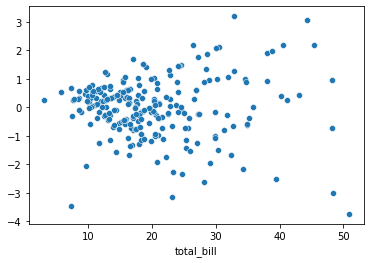

In [5]:
sns.scatterplot(x=tips_df.total_bill, y=(tips_df.yhat - tips_df.tip), data=tips_df)
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [6]:
sse2 = mean_squared_error(tips_df.tip, tips_df.yhat) * len(tips_df)
sse2

252.788743850776

In [7]:
ess = sum((tips_df.yhat - tips_df.tip.mean()) ** 2)
ess

212.4237331984042

In [8]:
tss = ess + sse2
tss

465.21247704918017

In [9]:
mse = mean_squared_error(tips_df.tip, tips_df.yhat)
mse

1.036019442011377

In [10]:
rmse = sqrt(mse)
rmse

1.0178504025697377

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [11]:
baseline_model = tips_df.tip.mean()
tips_df['yhat_baseline'] = baseline_model

In [12]:
sse2_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline) * len(tips_df)
sse2_baseline

465.2124770491804

In [13]:
ess_baseline = sum((tips_df.yhat_baseline - tips_df.tip.mean()) ** 2)
ess_baseline

0.0

In [14]:
tss_baseline = ess_baseline + sse2_baseline
tss_baseline

465.2124770491804

In [15]:
mse_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline)
mse_baseline

1.906608512496641

In [16]:
rmse_baseline = sqrt(mse_baseline)
rmse_baseline

1.3807999538298954

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [17]:
def compare_sum_squared_errors(model_sse2, baseline_sse2):
    delta = model_sse2 - baseline_sse2
    
    if (model_sse2 < baseline_sse2):
        print(f"The model performs better than the baseline with an SSE2 value of {model_sse2} and delta of {delta}")
        return True
    else:
        print(f"The baseline performs better than the model with an SSE2 value of {baseline_sse2} and delta of {delta}")
        return False

In [18]:
compare_sum_squared_errors(sse2, sse2_baseline)

The model performs better than the baseline with an SSE2 value of 252.788743850776 and delta of -212.4237331984044


True

## 7. What is the amount of variance explained in your model?

In [19]:
r2 = ols_model.rsquared
r2

0.45661658635167646

In [20]:
# Alternate method
r2_skl = explained_variance_score(tips_df.tip, tips_df.yhat)
r2_skl

0.4566165863516767

## 8. Is your model significantly better than the baseline model?

In [21]:
p_value = ols_model.f_pvalue
alpha = .05

(p_value, p_value < alpha)

(6.692470646863376e-34, True)

Since the p value is less than an alpha of .05, we can say that the correlation between the model and dependent variable is statistically significant, thus the model performs better than the baseline.

## 9. Create a file named evaluate.py that contains the following functions.

1. plot_residuals(y, yhat): creates a residual plot
2. regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
3. baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
4. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
5. model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [22]:
def plot_residuals(y, yhat):
    sns.scatterplot(x=y, y=yhat - y)
    plt.title("Residuals")
    plt.ylabel("yhat - y")
    plt.show()

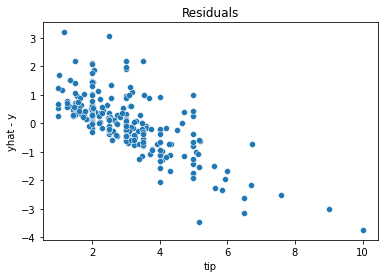

In [23]:
plot_residuals(tips_df.tip, tips_df.yhat)

In [24]:
def plot_residuals_against_x(x, y, yhat, df):
    sns.scatterplot(x=x, y=(yhat - y), data=df)
    plt.title("Residuals")
    plt.ylabel("yhat - y")
    plt.show()

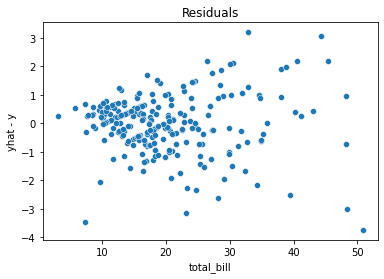

In [25]:
plot_residuals_against_x(tips_df.total_bill, tips_df.tip, tips_df.yhat, tips_df)

In [26]:
def regression_errors(y, yhat):
    sse2 = mean_squared_error(y, yhat) * len(y)
    ess = sum((yhat - y.mean()) ** 2)
    tss = ess + sse2
    mse = mean_squared_error(y, yhat)
    rmse = sqrt(mse)
    
    return sse2, ess, tss, mse, rmse

In [27]:
regression_errors(tips_df.tip, tips_df.yhat)

(252.788743850776,
 212.4237331984042,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

In [28]:
def baseline_mean_errors(y):
    index = []
    
    for i in range(1, len(y) + 1):
        index.append(i)
        
    y_mean = pd.Series(y.mean(), index=index)

    sse2_baseline = mean_squared_error(y, y_mean) * len(y)
    mse_baseline = mean_squared_error(y, y_mean)
    rmse_baseline = sqrt(mse_baseline)
    
    return sse2_baseline, mse_baseline, rmse_baseline

In [29]:
baseline_mean_errors(tips_df.tip)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [30]:
def better_than_baseline(y, yhat):
    sse2, ess, tss, mse, rmse = regression_errors(y, yhat)
    sse2_baseline, mse_baseline, rmse_baseline = baseline_mean_errors(y)
    
    compare_sum_squared_errors(sse2, sse2_baseline)

In [31]:
better_than_baseline(tips_df.tip, tips_df.yhat)

The model performs better than the baseline with an SSE2 value of 252.788743850776 and delta of -212.4237331984044


In [32]:
def model_signficance(ols_model):
    r2 = ols_model.rsquared
    p_value = ols_model.f_pvalue
    alpha = .05

    print(f"variance:  {r2}, p:  {p_value}, a: {alpha},  signficant:  {p_value < alpha}")
    return r2, p_value, p_value < alpha

In [33]:
model_signficance(ols_model)

variance:  0.45661658635167646, p:  6.692470646863376e-34, a: 0.05,  signficant:  True


(0.45661658635167646, 6.692470646863376e-34, True)

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [34]:
mpg_df = data("mpg")
mpg_df.sample(14)
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [35]:
mpg_ols_model = ols("hwy ~ displ", data=mpg_df).fit()

In [36]:
mpg_df['yhat'] = mpg_ols_model.predict(mpg_df['displ'])
mpg_df.sample(14)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,yhat
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,25.812002
95,ford,mustang,4.6,1999,8,auto(l4),r,15,21,r,subcompact,19.456943
111,hyundai,sonata,2.4,2008,4,auto(l4),f,21,30,r,midsize,27.224238
150,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,23.340590
212,volkswagen,gti,2.8,1999,6,manual(m5),f,17,24,r,compact,25.812002
49,dodge,dakota pickup 4wd,3.7,2008,6,manual(m6),4,15,19,r,pickup,22.634472
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,19.103884
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup,19.103884
191,toyota,camry solara,3.0,1999,6,auto(l4),f,18,26,r,compact,25.105885
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,28.636473


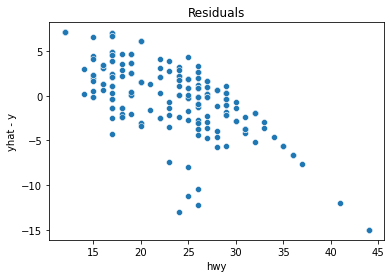

In [37]:
eval_util.plot_residuals(mpg_df.hwy, mpg_df.yhat)

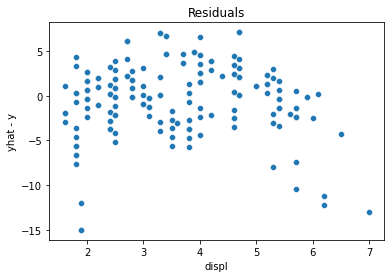

In [38]:
eval_util.plot_residuals_against_x(mpg_df.displ, mpg_df.hwy, mpg_df.yhat, mpg_df)

In [39]:
eval_util.regression_errors(mpg_df.hwy, mpg_df.yhat)

(3413.829008995466,
 4847.833384166932,
 8261.662393162398,
 14.589012858954984,
 3.819556631201452)

In [40]:
eval_util.baseline_mean_errors(mpg_df.hwy)

(8261.66239316239, 35.30624954342902, 5.941906221359356)

In [41]:
eval_util.better_than_baseline(mpg_df.hwy, mpg_df.yhat)

The model performs better than the baseline with an SSE2 value of 3413.829008995466 and delta of -4847.833384166925


True

In [42]:
eval_util.model_signficance(mpg_ols_model)

variance:  0.5867866723989039, p:  2.0389744555910457e-46, a: 0.05,  signficant:  True


(0.5867866723989039, 2.0389744555910457e-46, True)